# 收集
## / import lib

In [488]:
# import libs

## official libs
import pprint as pp
import requests

## 3rd libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
#通过 install Pillow安装

## private libs
#包括了一些数据评估的简单功能
import wrangling2 as w

## paras
%matplotlib inline

## / display setting

In [489]:
# set to show all row and column
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#!!!Beware of all long out put!!!
#https://stackoverflow.com/questions/27163830/ipython-notebook-pandas-max-allowable-columns

## / load df

In [490]:
# load df
## tweet_json 文件
## read_jason 有很多参数,可以参考官方文档
## 此处要加 lines=True
df_api = pd.read_json('tweet_json.txt',lines=True)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [491]:
## twitter-archive-enhanced 文件
df_arc = pd.read_csv('twitter-archive-enhanced.txt')

In [492]:
## image-predictions 文件
file_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(file_url)
file_name = 'image-predictions.tsv'
open(file_name, 'wb').write(r.content)
df_img = pd.read_csv(file_name, sep='\t')

# 评估 - twitt_json

In [493]:
# pprint, print, display 对比
## pprint 相比 print 提供了复杂结构 iterable 的分块输出
## pprint 和 print 对复杂结构的耗时较长
## display 可以提供相同 pprint 输出, 而且非常快
## 对于 jupyter 环境数据科学, pprint 并不是强需要
'''
data1 = [ (i, { 'a':'A',
               'b':'B',
               'c':'C',
               'd':'D',
               'e':'E',
               'f':'F',
               'g':'G',
               'h':'H',
               }) for i in range(3)
        ]

print(data1)

import pprint as pp
pp.pprint(data1)

display(data1)
''';

In [494]:
# check wranling docstring
print(w.__doc__)


function list:
1 /check df/
-1.1 checkdf(df) - 基准df信息输出
-1.2 checksample(df,random=42) - 对于列信息很多或者嵌套的,详细输出一个
2 /check column/
-2.1 checknest(df,colname) - 嵌套diclike信息输出
-2.2 checkvalue(df,list='all') - 检查指定列的value分布
3 /alter data/
-3.1 dorpcolumn(df,collist) - 删除列



## / check df

In [495]:
w.checkdf(df_api)

---checking start---

 --------------check shape---------------
(2352, 31)

 ---------------check info---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
created_at                       2352 non-null datetime64[ns, UTC]
id                               2352 non-null int64
id_str                           2352 non-null int64
full_text                        2352 non-null object
truncated                        2352 non-null bool
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
source                           2352 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user            

created_at                  id              id_str  \
0 2017-08-01 16:23:56+00:00  892420643555336193  892420643555336192   

                                           full_text  truncated  \
0  This is Phineas. He's a mystical boy. Only eve...      False   

  display_text_range                                           entities  \
0            [0, 85]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                   extended_entities  \
0  {'media': [{'id': 892420639486877696, 'id_str'...   

                                              source  in_reply_to_status_id  \
0  <a href="http://twitter.com/download/iphone" r...                    NaN   

   in_reply_to_status_id_str  in_reply_to_user_id  in_reply_to_user_id_str  \
0                        NaN                  NaN                      NaN   

  in_reply_to_screen_name                                               user  \
0                    None  {'id': 4196983835, 'id_str': '4196983835', 'na...   

   geo  coordinates place  contributors  is_quote_status  retweet_count  \
0  NaN          NaN  None           NaN            False           8842   

   favorite_count  favorited  retweeted  possibly_sensitive  \
0           39492      False      False                 0.0   

   possibly_sensitive_appealable lang retweeted_status  quoted_status_id  \
0                            0.0   en              NaN               NaN   

   quoted_status_id_str quoted_status  
0                   NaN           NaN

created_at                  id              id_str  \
2351 2015-11-15 22:32:08+00:00  666020888022790149  666020888022790144   

                                              full_text  truncated  \
2351  Here we have a Japanese Irish Setter. Lost eye...      False   

     display_text_range                                           entities  \
2351           [0, 131]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                      extended_entities  \
2351  {'media': [{'id': 666020881337073664, 'id_str'...   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   

      in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
2351                    NaN                        NaN                  NaN   

      in_reply_to_user_id_str in_reply_to_screen_name  \
2351                      NaN                    None   

                                                   user  geo  coordinates  \
2351  {'id': 4196983835, 'id_str': '4196983835', 'na...  NaN          NaN   

     place  contributors  is_quote_status  retweet_count  favorite_count  \
2351  None           NaN            False            530            2528   

      favorited  retweeted  possibly_sensitive  possibly_sensitive_appealable  \
2351      False      False                 0.0                            0.0   

     lang retweeted_status  quoted_status_id  quoted_status_id_str  \
2351   en              NaN               NaN                   NaN   

     quoted_status  
2351           NaN


 ---------------check null---------------
created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 279
source                              0
in_reply_to_status_id            2274
in_reply_to_status_id_str        2274
in_reply_to_user_id              2274
in_reply_to_user_id_str          2274
in_reply_to_screen_name          2274
user                                0
geo                              2352
coordinates                      2352
place                            2351
contributors                     2352
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                141
possibl

In [496]:
w.checksample(df_api)

---checking sample index: 1960---

- columns : created_at------
['2015-12-06T03:56:12.000000000']

- columns : id--------------
[673350198937153538]

- columns : id_str----------
[673350198937153536]

- columns : full_text-------
["This is Bella. She's a Genghis Flopped Canuck. Stuck in trash can. 9/10 not to happy about it https://t.co/RMv9EAv57u"]

- columns : truncated-------
[False]

- columns : display_text_range
[list([0, 117])]

- columns : entities--------
[{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 673350191790034944, 'id_str': '673350191790034944', 'indices': [94, 117], 'media_url': 'http://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CVg4bo8WEAANEEE.jpg', 'url': 'https://t.co/RMv9EAv57u', 'display_url': 'pic.twitter.com/RMv9EAv57u', 'expanded_url': 'https://twitter.com/dog_rates/status/673350198937153538/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'thu

In [497]:
w.checkdup(df_api)


 ----------- check duplicate ------------

 ----- Found List like, cant check ------
---checking complete---


## / drop (check df)

In [498]:
# drop list1
## 先删除重复和无意义的信息
dfdroplist = ['contributors','coordinates','geo','place','id_str',
             'in_reply_to_status_id_str','in_reply_to_user_id_str','quoted_status_id_str']

In [499]:
## drop list1 excute
w.dropcolumn(df_api,dfdroplist)

---proceding---
- drop 8 columns: ['contributors', 'coordinates', 'geo', 'place', 'id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str'] 
- remain 23 columns
- success : True


## / check column

In [500]:
# checkvalue 处理不了listlike数据, 根据报错指定list
checklist = df_api.columns.tolist()
len(checklist)

23

In [501]:
omitlist = ['display_text_range','entities','extended_entities','quoted_status','retweeted_status','user']

In [502]:
for i in omitlist:
    checklist.remove(i)

len(checklist)

17

In [503]:
w.checkvalue(df_api,checklist)


-check column value: ---created_at---
largest:
 2016-09-12 15:10:21+00:00    1
2016-06-03 01:07:16+00:00    1
2017-01-31 01:27:39+00:00    1
2016-10-13 23:23:56+00:00    1
2016-06-27 01:37:04+00:00    1
Name: created_at, dtype: int64
smallest
: 2016-09-12 15:10:21+00:00    1
2016-06-03 01:07:16+00:00    1
2017-01-31 01:27:39+00:00    1
2016-10-13 23:23:56+00:00    1
2016-06-27 01:37:04+00:00    1
2016-07-26 00:08:05+00:00    1
2016-01-05 02:30:55+00:00    1
2016-12-14 17:16:53+00:00    1
2015-11-27 22:01:40+00:00    1
2017-03-26 01:38:00+00:00    1
Name: created_at, dtype: int64

-check column value: -------id-------
largest:
 749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: id, dtype: int64
smallest
: 749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641

In [504]:
for i in omitlist:
    w.checknest(df_api,i)


 // checking nested data: display_text_range //
[0, 105]

 // checking nested data: entities //
{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/mVfqRdppTL',
            'expanded_url': 'https://twitter.com/dog_rates/status/733822306246479872/photo/1',
            'id': 733822298390548480,
            'id_str': '733822298390548480',
            'indices': [80, 103],
            'media_url': 'http://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg',
            'sizes': {'large': {'h': 935, 'resize': 'fit', 'w': 608},
                      'medium': {'h': 935, 'resize': 'fit', 'w': 608},
                      'small': {'h': 680, 'resize': 'fit', 'w': 442},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'type': 'photo',
            'url': 'https://t.co/mVfqRdppTL'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}

 // checking nested data: extended_entities //
na

## / check column (special)
对一些怀疑是否有用的数据进行检视

In [505]:
## define inspect list1
speciallist = ['favorited','in_reply_to_screen_name','in_reply_to_status_id',
            'in_reply_to_user_id','is_quote_status','lang','possibly_sensitive',
            'possibly_sensitive_appealable','quoted_status_id','retweeted','truncated']

In [506]:
## inspect info
df_api[speciallist].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 11 columns):
favorited                        2352 non-null bool
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_user_id              78 non-null float64
is_quote_status                  2352 non-null bool
lang                             2352 non-null object
possibly_sensitive               2211 non-null float64
possibly_sensitive_appealable    2211 non-null float64
quoted_status_id                 29 non-null float64
retweeted                        2352 non-null bool
truncated                        2352 non-null bool
dtypes: bool(4), float64(5), object(2)
memory usage: 137.9+ KB


In [507]:
print(w.__doc__)


function list:
1 /check df/
-1.1 checkdf(df) - 基准df信息输出
-1.2 checksample(df,random=42) - 对于列信息很多或者嵌套的,详细输出一个
2 /check column/
-2.1 checknest(df,colname) - 嵌套diclike信息输出
-2.2 checkvalue(df,list='all') - 检查指定列的value分布
3 /alter data/
-3.1 dorpcolumn(df,collist) - 删除列



In [508]:
## inspect value
w.checkvalue(df_api,speciallist)


-check column value: ---favorited----
largest:
 False    2352
Name: favorited, dtype: int64
smallest
: False    2352
Name: favorited, dtype: int64

-check column value: in_reply_to_screen_name
largest:
 dog_rates      47
markhoppus      2
bragg6of8       1
0_kelvin_0      1
mount_alex3     1
Name: in_reply_to_screen_name, dtype: int64
smallest
: bragg6of8          1
0_kelvin_0         1
mount_alex3        1
spaghemily         1
CommonWhiteGirI    1
dhmontgomery       1
NBCSports          1
HistoryInPics      1
Marc_IRL           1
JODYHiGHROLLER     1
Name: in_reply_to_screen_name, dtype: int64

-check column value: in_reply_to_status_id
largest:
 6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
Name: in_reply_to_status_id, dtype: int64
smallest
: 8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
Name: in_reply_to_st

### quoted_status

In [509]:
# special1 quoted_status
## quoted_status is a dict, move it to detlist
## check values (almost is null)
df_api.quoted_status.isnull().value_counts()

True     2324
False      28
Name: quoted_status, dtype: int64

In [510]:
## check a sample
df_api[df_api.quoted_status.notnull()].sample(1).quoted_status.iloc[0]
### this is some extra info abou a forward

{'created_at': 'Sat Sep 03 03:00:03 +0000 2016',
 'id': 771905568600719360,
 'id_str': '771905568600719360',
 'full_text': 'Nine days after the earthquake, a dog is rescued from the rubble in Italy https://t.co/bx4QcaCSl7 https://t.co/31hQrrYGGB',
 'truncated': False,
 'display_text_range': [0, 97],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/bx4QcaCSl7',
    'expanded_url': 'http://yhoo.it/2bZlue8',
    'display_url': 'yhoo.it/2bZlue8',
    'indices': [74, 97]}],
  'media': [{'id': 771905566990041088,
    'id_str': '771905566990041088',
    'indices': [98, 121],
    'media_url': 'http://pbs.twimg.com/media/CrZcBgCWgAAKIaJ.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CrZcBgCWgAAKIaJ.jpg',
    'url': 'https://t.co/31hQrrYGGB',
    'display_url': 'pic.twitter.com/31hQrrYGGB',
    'expanded_url': 'https://twitter.com/YahooNews/status/771905568600719360/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 700, 

- 分析 `quoted_status`:
    - 是嵌套字典数据
    - 缺失很多(只有28个数据)
    - 内容无用信息比较多
- 结论:
    - 删除此列
    - user 列和此列类似,也删除

### in_reply_to_screen_name

In [511]:
# special2
## in_reply_to_screen_name have value dog_rates for 47 times
df_api.query('in_reply_to_screen_name == "dog_rates"')[:3]

created_at                  id  \
147 2017-05-12 17:12:53+00:00  863079547188785154   
181 2017-04-24 15:13:52+00:00  856526610513747968   
225 2017-04-01 16:41:12+00:00  848213670039564288   

                                             full_text  truncated  \
147  Ladies and gentlemen... I found Pipsy. He may ...      False   
181  THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...      False   
225  Jerry just apuppologized to me. He said there ...      False   

    display_text_range                                           entities  \
147           [0, 139]  {'hashtags': [], 'symbols': [], 'user_mentions...   
181           [0, 112]  {'hashtags': [], 'symbols': [], 'user_mentions...   
225           [0, 135]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                     extended_entities  \
147  {'media': [{'id': 863079538779013120, 'id_str'...   
181  {'media': [{'id': 856526604033556482, 'id_str'...   
225                                                NaN   

                                                source  in_reply_to_status_id  \
147  <a href="http://twitter.com/download/iphone" r...           6.671522e+17   
181  <a href="http://twitter.com/download/iphone" r...           8.558181e+17   
225  <a href="http://twitter.com/download/iphone" r...           8.482121e+17   

     in_reply_to_user_id in_reply_to_screen_name  \
147         4.196984e+09               dog_rates   
181         4.196984e+09               dog_rates   
225         4.196984e+09               dog_rates   

                                                  user  is_quote_status  \
147  {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
181  {'id': 4196983835, 'id_str': '4196983835', 'na...            False   
225  {'id': 4196983835, 'id_str': '4196983835', 'na...            False   

     retweet_count  favorite_count  favorited  retweeted  possibly_sensitive  \
147           1188            9068      False      False                 0.0   
181           2053           12412      False      False                 0.0   
225            825            8799      False      False                 NaN   

     possibly_sensitive_appealable lang retweeted_status  quoted_status_id  \
147                            0.0   en              NaN               NaN   
181                            0.0   en              NaN               NaN   
225                            NaN   en              NaN               NaN   

    quoted_status  
147           NaN  
181           NaN  
225           NaN

In [512]:
df_api['in_reply_to_screen_name'].isnull().sum() / df_api.shape[0]

0.9668367346938775

- 分析`in_reply_to_screen_name`:
    - 可能 `dog_rates` 是默认回复名字
    - 数据缺失率为 97%
- 结论:
    - 删除数据

### entities / extended_entities
对嵌套的数据进行检视

In [513]:
# detail list1
## check dict long columns
nestlist = ['entities','extended_entities']

In [514]:
for i in nestlist:
    w.checknest(df_api,i)


 // checking nested data: entities //
{'hashtags': [],
 'media': [{'display_url': 'pic.twitter.com/ZlcF0TIRW1',
            'expanded_url': 'https://twitter.com/dog_rates/status/672975131468300288/photo/1',
            'id': 672975080402628609,
            'id_str': '672975080402628609',
            'indices': [71, 94],
            'media_url': 'http://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg',
            'media_url_https': 'https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg',
            'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 1024},
                      'medium': {'h': 1024, 'resize': 'fit', 'w': 1024},
                      'small': {'h': 680, 'resize': 'fit', 'w': 680},
                      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
            'type': 'photo',
            'url': 'https://t.co/ZlcF0TIRW1'}],
 'symbols': [],
 'urls': [],
 'user_mentions': []}

 // checking nested data: extended_entities //
{'media': [{'display_url': 'pic.twitter.com/YOHe6lf09m',


- 分析:
    - 是嵌套字典数据
    - 缺失不多
    - 内容无用信息比较多(有些与其他列有重复)
- 结论:
    - 删除列



### display_text_range
使用函数check_value会在这一列报错,检查下是因为这列的列表嵌套数字的原因

In [515]:
# check specified
df_api.display_text_range.sample(5)

2277    [0, 106]
1616    [0, 138]
1740     [0, 66]
2210    [0, 140]
1510     [0, 71]
Name: display_text_range, dtype: object

## / drop (check column)
根据上面 check 内容删除数据

In [516]:
# droplist2
columndroplist = speciallist.copy()
#use .copy to copy rather than llink
columndroplist.append('quoted_status')
columndroplist.append('retweeted_status')
columndroplist.append('user')
columndroplist.append('entities')
columndroplist.append('extended_entities')
columndroplist

['favorited',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'is_quote_status',
 'lang',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status_id',
 'retweeted',
 'truncated',
 'quoted_status',
 'retweeted_status',
 'user',
 'entities',
 'extended_entities']

In [517]:
## drop excute
w.dropcolumn(df_api,columndroplist)

---proceding---
- drop 16 columns: ['favorited', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'is_quote_status', 'lang', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status_id', 'retweeted', 'truncated', 'quoted_status', 'retweeted_status', 'user', 'entities', 'extended_entities'] 
- remain 7 columns
- success : True


## / review (quanlity)
根据数据删除剩余7列 ['created_at', 'display_text_range', 'favorite_count', 'full_text', 'id',
       'retweet_count', 'source']
- id 为标识列
- created_at 包括时间、日期,可以进行时序分析
- display_text_range 为文字长度
- favorite_count 为点赞数
- full_text 为文字内容
- retweet_count 为回复数
- source 为来源

## / persistence

In [518]:
df_api.to_pickle('df_api.pickle.xz', compression='xz')

# 评估 - twitter-archive-enhanced 
## / checkdf

可以根据先做的的清理，先删除一些列。实际应该是先处理主数据，其他的做补充

In [519]:
w.checkdf(df_arc)

---checking start---

 --------------check shape---------------
(2356, 17)

 ---------------check info---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper          

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2355                  10  None  None    None   None  None


 ---------------check null---------------
tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64
---checking complete---


In [520]:
# 对比两个文件的列
print(df_api.columns)
print(df_arc.columns)

Index(['created_at', 'id', 'full_text', 'display_text_range', 'source',
       'retweet_count', 'favorite_count'],
      dtype='object')
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


## / drop (check df)

In [521]:
#根据上面对比，直接删除列
dfdroplist = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls']

In [522]:
w.dropcolumn(df_arc, dfdroplist)

---proceding---
- drop 7 columns: ['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'] 
- remain 10 columns
- success : True


## / check column (special)

In [523]:
## define inspect list1
speciallist = ['rating_numerator', 'rating_denominator','name','doggo','floofer', 'pupper','puppo']
w.checkvalue(df_arc, speciallist)


-check column value: rating_numerator
largest:
 12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64
smallest
: 80     1
20     1
24     1
26     1
44     1
50     1
60     1
165    1
84     1
88     1
Name: rating_numerator, dtype: int64

-check column value: rating_denominator
largest:
 10    2333
11       3
50       3
80       2
20       2
Name: rating_denominator, dtype: int64
smallest
: 2      1
16     1
40     1
70     1
15     1
90     1
110    1
120    1
130    1
150    1
Name: rating_denominator, dtype: int64

-check column value: ------name------
largest:
 None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Name: name, dtype: int64
smallest
: Nimbus        1
Tobi          1
Humphrey      1
Amber         1
Cecil         1
Olaf          1
Chesterson    1
Gerbald       1
Stewie        1
Rueben        1
Name: name, dtype: int64

-check column value: -----doggo------
largest:
 None     2259
doggo      97
Name: doggo, dtype:

In [524]:
print(df_api.columns)
print(df_arc.columns)

Index(['created_at', 'id', 'full_text', 'display_text_range', 'source',
       'retweet_count', 'favorite_count'],
      dtype='object')
Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


## / review
- df_arc 作为主数据，只要增加 df_api 中的 retweet_count 和 favorite_count 

## / persistence

In [525]:
df_arc.to_pickle('df_arc.pickle.xz', compression='xz')

# 评估 - image-predictions
## / check df

In [526]:
w.checkdf(df_img)

---checking start---

 --------------check shape---------------
(2075, 12)

 ---------------check info---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None

 ----------check head and tail-----------


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

tweet_id                                          jpg_url  \
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num      p1   p1_conf  p1_dog     p2   p2_conf  p2_dog      p3  \
2074        1  orange  0.097049   False  bagel  0.085851   False  banana   

      p3_conf  p3_dog  
2074  0.07611   False


 ---------------check null---------------
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
---checking complete---


## / review
- df_img 是对上传狗狗分类相片的分析，这里只把第1分类的3个列加入到 df_arc 中就可以了

## / persistence

In [527]:
df_img.to_pickle('df_img.pickle.xz', compression='xz')

# 评估 - 总结
- 开始的顺序有问题，如果先从 df_arc 分析会没有这么复杂
- 本部分将把3个数据集形成主数据集

## / load df (inspect)

In [528]:
# code
df_arc = pd.read_pickle('df_arc.pickle.xz', compression='xz')
df_api = pd.read_pickle('df_api.pickle.xz', compression='xz')
df_img = pd.read_pickle('df_img.pickle.xz', compression='xz')

## / merge df
- merge df_api
    - retweet_count
    - favorite_count 
- merge df_img
    - p1
    - p1_conf
    - pi_dog

In [529]:
# rename id to merge
df_api.rename(columns={'id':'tweet_id'},inplace=True)

In [530]:
# minimal merge df
df_api = df_api[['tweet_id','retweet_count','favorite_count','display_text_range']]
df_img = df_img[['tweet_id','p1','p1_conf','p1_dog']]

In [531]:
print(df_api.columns)
print(df_arc.columns)
print(df_img.columns)

Index(['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'], dtype='object')
Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'p1', 'p1_conf', 'p1_dog'], dtype='object')


In [532]:
df = df_arc.merge(df_api,on='tweet_id').merge(df_img,on='tweet_id')

In [533]:
w.checkdf(df)

---checking start---

 --------------check shape---------------
(2073, 16)

 ---------------check info---------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
text                  2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
display_text_range    2073 non-null object
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 261.1+ KB
None

 ----------che

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   

   rating_denominator     name doggo floofer pupper puppo  retweet_count  \
0                  10  Phineas  None    None   None  None           8842   

   favorite_count display_text_range      p1   p1_conf  p1_dog  
0           39492            [0, 85]  orange  0.097049   False

tweet_id                  timestamp  \
2072  666020888022790149  2015-11-15 22:32:08 +0000   

                                                   text  rating_numerator  \
2072  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator  name doggo floofer pupper puppo  retweet_count  \
2072                  10  None  None    None   None  None            530   

      favorite_count display_text_range                      p1   p1_conf  \
2072            2528           [0, 131]  Welsh_springer_spaniel  0.465074   

      p1_dog  
2072    True


 ---------------check null---------------
tweet_id              0
timestamp             0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
retweet_count         0
favorite_count        0
display_text_range    0
p1                    0
p1_conf               0
p1_dog                0
dtype: int64
---checking complete---


## / persistence

In [534]:
df.to_pickle('df.pickle.xz', compression='xz')

# 清理（Tidiness）
根据质量部分的输出,对于除id列之外的需要进行清洁度的整理
- created_at 包括时间、日期,可以进行时序分析
    - 转换为 datafame 的 timeseries index
- display_text_range 为文字长度
    - 原格式为 [0-x] x实际为推文长度,需要提取 x, 有个别是 [x-y], 不知道为什么还有下限, 提取上限数据即可
    - 本列为非必须列,可以根据 full_text 得出回复长度
- favorite_count 为点赞数
    - 数字类型,无需转换
- full_text 为文字内容
    - 后续如果进行nlp的分析需要进行向量化
- retweet_count 为回复数
    - 数字类型,无需转换
- doggo 等分类信息转换为 bool 格式
    - 来源为链接,中间为发布信息的设备
    - 需要使用 re 来完成提取
    - 最后输出为分类信息

## / load df

In [535]:
df_clean = pd.read_pickle('df.pickle.xz', compression='xz')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
text                  2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
display_text_range    2073 non-null object
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 261.1+ KB


## / created_at
define: 将数据转换为时间格式
- solution1 使用 dataframe 的 datatime 格式
    - 数据本身为 datetime 格式
    - 如果是时序的数据可以将时间转换为 index,非常方便筛选 https://chrisalbon.com/python/data_wrangling/pandas_time_series_basics/
- (solution2 使用 python datatime 格式、calendar格式)

In [536]:
# 根据上述观察, 发现时间是按照发生顺序倒序排列的
## 时序分析入门 https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html
## 需要转换为 datetime index (方便筛选)
## 将在正式数据上实现
### df.where 可以直接替换,有空测试
df_clean.index = pd.to_datetime(df_clean.timestamp)
df_clean.index.name = 'time_index'

In [537]:
droplist = ['timestamp']
w.dropcolumn(df_clean, droplist)

---proceding---
- drop 1 columns: ['timestamp'] 
- remain 15 columns
- success : True


In [538]:
df_clean['20170101']

tweet_id  \
time_index                                      
2017-01-01 19:22:38+00:00  815639385530101762   
2017-01-01 02:53:20+00:00  815390420867969024   

                                                                        text  \
time_index                                                                     
2017-01-01 19:22:38+00:00  This is Titan. His nose is quite chilly. Reque...   
2017-01-01 02:53:20+00:00  Happy New Year from the squad! 13/10 for all h...   

                           rating_numerator  rating_denominator   name doggo  \
time_index                                                                     
2017-01-01 19:22:38+00:00                12                  10  Titan  None   
2017-01-01 02:53:20+00:00                13                  10   None  None   

                          floofer pupper puppo  retweet_count  favorite_count  \
time_index                                                                      
2017-01-01 19:22:38+00:00    None   None  None           1901            9130   
2017-01-01 02:53:20+00:00    None   None  None           4388           11423   

                          display_text_range               p1   p1_conf  \
time_index                                                                
2017-01-01 19:22:38+00:00           [0, 100]  German_shepherd  0.817953   
2017-01-01 02:53:20+00:00            [0, 44]       restaurant  0.279846   

                           p1_dog  
time_index                         
2017-01-01 19:22:38+00:00    True  
2017-01-01 02:53:20+00:00   False

## / display_text_range
define: 抽取出 text 的长度,存为整数
- solution1 使用 python standard re lib
    - 抽出字符
    - 转换为 int
- https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html 非常全面的介绍

In [539]:
# code
## extract str
df_clean.display_text_range[:10]

time_index
2017-08-01 16:23:56+00:00     [0, 85]
2017-08-01 00:17:27+00:00    [0, 138]
2017-07-31 00:18:03+00:00    [0, 121]
2017-07-30 15:58:51+00:00     [0, 79]
2017-07-29 16:00:24+00:00    [0, 138]
2017-07-29 00:08:17+00:00    [0, 138]
2017-07-28 16:27:12+00:00    [0, 140]
2017-07-28 00:22:40+00:00    [0, 118]
2017-07-27 16:25:51+00:00    [0, 122]
2017-07-26 15:59:51+00:00    [0, 133]
Name: display_text_range, dtype: object

In [540]:
## 使用.str[slice] 直接解析相应位置的数字
df_clean.display_text_range = df_clean.display_text_range.str[1].astype(int)

In [541]:
df_clean.describe()

tweet_id  rating_numerator  rating_denominator  retweet_count  \
count  2.073000e+03       2073.000000         2073.000000    2073.000000   
mean   7.383196e+17         12.265316           10.511819    2959.425953   
std    6.775074e+16         40.699922            7.180517    5029.269674   
min    6.660209e+17          0.000000            2.000000      15.000000   
25%    6.764706e+17         10.000000           10.000000     630.000000   
50%    7.119681e+17         11.000000           10.000000    1401.000000   
75%    7.931808e+17         12.000000           10.000000    3420.000000   
max    8.924206e+17       1776.000000          170.000000   79116.000000   

       favorite_count  display_text_range      p1_conf  
count     2073.000000         2073.000000  2073.000000  
mean      8583.081524          111.589001     0.594555  
std      12281.014912           26.263146     0.271217  
min          0.000000           13.000000     0.044333  
25%       1665.000000           94.000000     0.364095  
50%       3846.000000          116.000000     0.588230  
75%      10902.000000          137.000000     0.843911  
max     132318.000000          148.000000     1.000000

## / full_text
define:
- 每个评价后面都有一个分值和链接 11/10 https://t.co/8W5iSOgXfx
- 评分为 10/10 或 11/10,没找到说明, 官网上有说明为什么评分都大于10
- 需要删除后保存
- 此处不做处理,词云的制作最后再做
- try solution
    - str.replace
    - str[i]
    - str.extract(r'[ab](\d))
    - pat = / str.match
    - str.contains
    - get.dummies(sep=',')

In [542]:
# code
#detlist = ['text']
df_clean.text[:10]

time_index
2017-08-01 16:23:56+00:00    This is Phineas. He's a mystical boy. Only eve...
2017-08-01 00:17:27+00:00    This is Tilly. She's just checking pup on you....
2017-07-31 00:18:03+00:00    This is Archie. He is a rare Norwegian Pouncin...
2017-07-30 15:58:51+00:00    This is Darla. She commenced a snooze mid meal...
2017-07-29 16:00:24+00:00    This is Franklin. He would like you to stop ca...
2017-07-29 00:08:17+00:00    Here we have a majestic great white breaching ...
2017-07-28 16:27:12+00:00    Meet Jax. He enjoys ice cream so much he gets ...
2017-07-28 00:22:40+00:00    When you watch your owner call another dog a g...
2017-07-27 16:25:51+00:00    This is Zoey. She doesn't want to be one of th...
2017-07-26 15:59:51+00:00    This is Cassie. She is a college pup. Studying...
Name: text, dtype: object

In [543]:
# extrac
df_clean.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [544]:
## extract testing
'''
s = pd.Series(['a1', 'b2', 'c3'])
s.str.extract(r'([ab])(\d)')
''';

In [545]:
text = df_clean.text.str.lower()
text[117]

"we only rate dogs. please don't send in jesus. we're trying to remain professional and legitimate. thank you... 14/10 https://t.co/wr3xsjecir"

In [546]:
df_clean['clean_text'] = text.str.extract('(.*)(\d{2}\/\d{2})')[0]
#前面小括弧是贪心匹配，后面的是数字区分

In [547]:
droplist = ['text']
w.dropcolumn(df_clean,droplist)

---proceding---
- drop 1 columns: ['text'] 
- remain 15 columns
- success : True


## / data type

In [548]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2073 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 15 columns):
tweet_id              2073 non-null int64
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
display_text_range    2073 non-null int32
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
clean_text            1663 non-null object
dtypes: bool(1), float64(1), int32(1), int64(5), object(7)
memory usage: 316.9+ KB


In [549]:
# 应为画图的问题（_bool 兼容性问题），bool转换先跳过
'''
df_clean.pupper = df_clean.pupper.astype(bool)
df_clean.floofer = df_clean.floofer.astype(bool)
df_clean.doggo = df_clean.doggo.astype(bool)
df_clean.puppo = df_clean.puppo.astype(bool)
'''
df_clean.p1_dog = df_clean.p1_dog.astype(str)

In [550]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2073 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 15 columns):
tweet_id              2073 non-null int64
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
display_text_range    2073 non-null int32
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null object
clean_text            1663 non-null object
dtypes: float64(1), int32(1), int64(5), object(8)
memory usage: 331.0+ KB


## / check - null
- 转换表示空值的字符后续补充

In [551]:
df_clean.isnull().sum()

tweet_id                0
rating_numerator        0
rating_denominator      0
name                    0
doggo                   0
floofer                 0
pupper                  0
puppo                   0
retweet_count           0
favorite_count          0
display_text_range      0
p1                      0
p1_conf                 0
p1_dog                  0
clean_text            410
dtype: int64

## / check - duplicated
- 因为 duplicated 是对行进行操作，需要在最后生产数据集中进行检查

In [552]:
df1.duplicated().sum()

0

In [553]:
w.checkvalue(df_clean)


-check column value: ----tweet_id----
largest:
 685532292383666176    1
732585889486888962    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
Name: tweet_id, dtype: int64
smallest
: 685532292383666176    1
732585889486888962    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
805487436403003392    1
842765311967449089    1
685315239903100929    1
Name: tweet_id, dtype: int64

-check column value: rating_numerator
largest:
 12    474
10    429
11    413
13    282
9     151
Name: rating_numerator, dtype: int64
smallest
: 80     1
24     1
26     1
44     1
50     1
60     1
165    1
84     1
88     1
144    1
Name: rating_numerator, dtype: int64

-check column value: rating_denominator
largest:
 10    2055
50       3
11       2
80       2
7        1
Name: rating_denominator, dtype: int64
smallest
: 7      1
170    1
150    1
130    1
120    1
110    1
90     1
70     1
40     1
20     1
Na

## / check outlier
- 这部分有点懵，后续补充

## / persistence

In [554]:
# code
df_clean.to_pickle('df.pickle.xz', compression='xz')

# 探索 (非项目要求）

## / load df

In [555]:
# code
df = pd.read_pickle('df.pickle.xz', compression='xz')
df.sample()

tweet_id  rating_numerator  \
time_index                                                        
2016-03-12 19:35:15+00:00  708738143638450176                11   

                           rating_denominator  name doggo floofer pupper  \
time_index                                                                 
2016-03-12 19:35:15+00:00                  10  Coco  None    None   None   

                          puppo  retweet_count  favorite_count  \
time_index                                                       
2016-03-12 19:35:15+00:00  None            914            2984   

                           display_text_range          p1   p1_conf p1_dog  \
time_index                                                                   
2016-03-12 19:35:15+00:00                 107  Pomeranian  0.933457   True   

                                                                  clean_text  
time_index                                                                    
2016-03-12 19:35:15+00:00  this is coco. she gets to stay on the bachelor...

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2073 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 15 columns):
tweet_id              2073 non-null int64
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
retweet_count         2073 non-null int64
favorite_count        2073 non-null int64
display_text_range    2073 non-null int32
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null object
clean_text            1663 non-null object
dtypes: float64(1), int32(1), int64(5), object(8)
memory usage: 251.0+ KB


## / data visulization

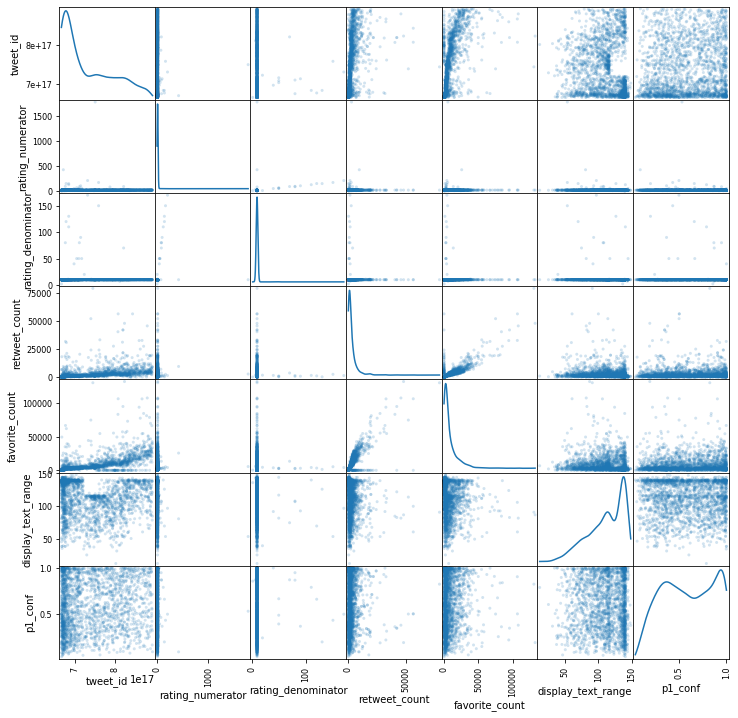

In [557]:
# code
# Scatter Matrix Plot
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde');

In [558]:
# 此处散点图参见 v2 版本文件

## / word cloud
### // word cloud library

In [559]:
# code
#pip install wordcloud

### // prepare word

In [560]:
df.clean_text[:5]

time_index
2017-08-01 16:23:56+00:00    this is phineas. he's a mystical boy. only eve...
2017-08-01 00:17:27+00:00    this is tilly. she's just checking pup on you....
2017-07-31 00:18:03+00:00    this is archie. he is a rare norwegian pouncin...
2017-07-30 15:58:51+00:00     this is darla. she commenced a snooze mid meal. 
2017-07-29 16:00:24+00:00    this is franklin. he would like you to stop ca...
Name: clean_text, dtype: object

In [561]:
# 使用 sum 前要删除 null 值, 否则会报错
str_input = df.clean_text.dropna()
str_input.isnull().sum()
# 聚合方式可以参考
# https://stackoverflow.com/questions/47465542/how-to-concatenate-all-string-values-in-a-given-pandas-dataframe-row-to-one-st

0

In [562]:
text_twitter = str_input.sum()
text_twitter[:1000]

'this is phineas. he\'s a mystical boy. only ever appears in the hole of a donut. this is tilly. she\'s just checking pup on you. hopes you\'re doing ok. if not, she\'s available for pats, snugs, boops, the whole bit. this is archie. he is a rare norwegian pouncing corgo. lives in the tall grass. you never know when one may strike. this is darla. she commenced a snooze mid meal. this is franklin. he would like you to stop calling him "cute." he is a very fierce shark and should be respected as such. here we have a majestic great white breaching off south africa\'s coast. absolutely h*ckin breathtaking. meet jax. he enjoys ice cream so much he gets nervous around it. when you watch your owner call another dog a good boy but then they turn back to you and say you\'re a great boy. this is zoey. she doesn\'t want to be one of the scary sharks. just wants to be a snuggly pettable boatpet. this is cassie. she is a college pup. studying international doggo communication and stick theory. this

### // word cloud

In [563]:
# 将图像转为 np 二维数据 (所以是png还是jpeg应该没有关系)
# read the mask / color image taken from
color3 = np.array(Image.open("t1.png"))
color4 = np.array(Image.open("t2.png"))

# 设置停用词
stopwords = set(STOPWORDS)
stopwords.add("said")

In [564]:
# wordcloud 参数
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, max_font_size=40, random_state=42)

## https://github.com/amueller/word_cloud 
## git 中提供例子和cli(可以根据 text 和 pic 直接输出词云, 非常方便

In [565]:
wc.generate(text_twitter);

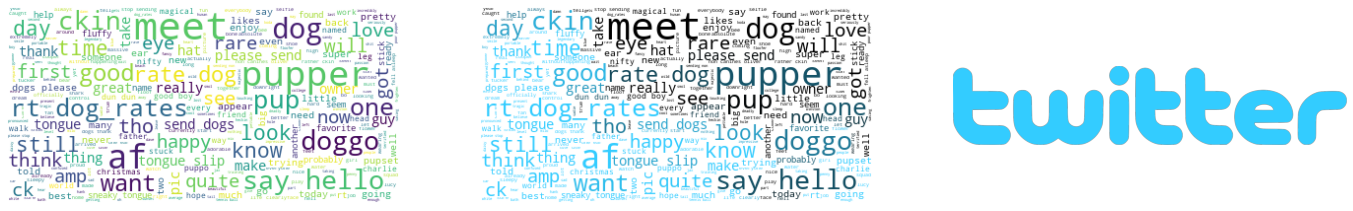

In [566]:
# create coloring from image
image_colors = ImageColorGenerator(color4)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# show
fig, axes = plt.subplots(1, 3, figsize=(24,4))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

In [567]:
# 增加 mask 蒙版系列
wc = WordCloud(background_color="white", max_words=2000, mask=color4,
               stopwords=stopwords, max_font_size=40, random_state=42)
wc.generate(text_twitter);

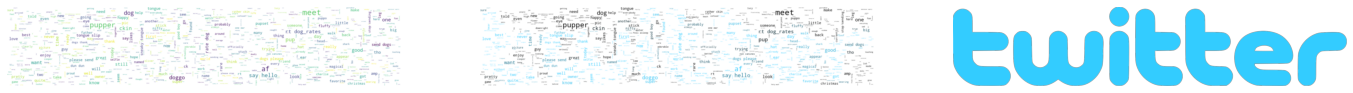

In [568]:
# create coloring from image
image_colors = ImageColorGenerator(color4)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# show
fig, axes = plt.subplots(1, 3, figsize=(24,4))
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

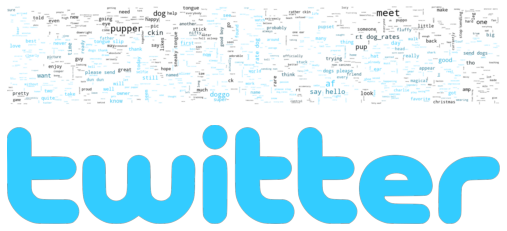

In [569]:
# 输出两个图像做对比
# show
fig, axes = plt.subplots(2, 1, figsize=(20,4))
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();
## 不是特别美观, 看来wordcloud如果使用mask和图像的样子关系很大

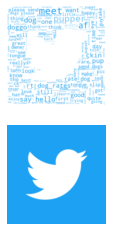

In [570]:
# 增加 mask 蒙版系列2
wc = WordCloud(background_color="white", max_words=200, mask=color3,
               stopwords=stopwords, max_font_size=40, random_state=42)
wc.generate(text_twitter);

# create coloring from image
image_colors = ImageColorGenerator(color3)

# 可以直接在构造函数中直接给颜色
# 通过这种方式词云将会按照给定的图片颜色布局生成字体颜色策略

# 输出两个图像做对比
# show
fig, axes = plt.subplots(2, 1)
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color3, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();
## 不是特别美观, 看来wordcloud如果使用mask和图像的样子关系很大
### 大小和图片分辨率相同
### 遇到有的图片会报错
## 感觉对分词如果用 nltk 处理下可能会更好
### https://sqlshep.com/?p=971
# 更新! relative_scaling 参数特别重要(见结论图)

## / time series analysis
https://ourcodingclub.github.io/2019/01/07/pandas-time-series.html

In [571]:
df.head(10)

tweet_id  rating_numerator  \
time_index                                                        
2017-08-01 16:23:56+00:00  892420643555336193                13   
2017-08-01 00:17:27+00:00  892177421306343426                13   
2017-07-31 00:18:03+00:00  891815181378084864                12   
2017-07-30 15:58:51+00:00  891689557279858688                13   
2017-07-29 16:00:24+00:00  891327558926688256                12   
2017-07-29 00:08:17+00:00  891087950875897856                13   
2017-07-28 16:27:12+00:00  890971913173991426                13   
2017-07-28 00:22:40+00:00  890729181411237888                13   
2017-07-27 16:25:51+00:00  890609185150312448                13   
2017-07-26 15:59:51+00:00  890240255349198849                14   

                           rating_denominator      name  doggo floofer pupper  \
time_index                                                                      
2017-08-01 16:23:56+00:00                  10   Phineas   None    None   None   
2017-08-01 00:17:27+00:00                  10     Tilly   None    None   None   
2017-07-31 00:18:03+00:00                  10    Archie   None    None   None   
2017-07-30 15:58:51+00:00                  10     Darla   None    None   None   
2017-07-29 16:00:24+00:00                  10  Franklin   None    None   None   
2017-07-29 00:08:17+00:00                  10      None   None    None   None   
2017-07-28 16:27:12+00:00                  10       Jax   None    None   None   
2017-07-28 00:22:40+00:00                  10      None   None    None   None   
2017-07-27 16:25:51+00:00                  10      Zoey   None    None   None   
2017-07-26 15:59:51+00:00                  10    Cassie  doggo    None   None   

                          puppo  retweet_count  favorite_count  \
time_index                                                       
2017-08-01 16:23:56+00:00  None           8842           39492   
2017-08-01 00:17:27+00:00  None           6480           33786   
2017-07-31 00:18:03+00:00  None           4301           25445   
2017-07-30 15:58:51+00:00  None           8925           42863   
2017-07-29 16:00:24+00:00  None           9721           41016   
2017-07-29 00:08:17+00:00  None           3240           20548   
2017-07-28 16:27:12+00:00  None           2142           12053   
2017-07-28 00:22:40+00:00  None          19548           66596   
2017-07-27 16:25:51+00:00  None           4403           28187   
2017-07-26 15:59:51+00:00  None           7684           32467   

                           display_text_range                        p1  \
time_index                                                                
2017-08-01 16:23:56+00:00                  85                    orange   
2017-08-01 00:17:27+00:00                 138                 Chihuahua   
2017-07-31 00:18:03+00:00                 121                 Chihuahua   
2017-07-30 15:58:51+00:00                  79               paper_towel   
2017-07-29 16:00:24+00:00                 138                    basset   
2017-07-29 00:08:17+00:00                 138  Chesapeake_Bay_retriever   
2017-07-28 16:27:12+00:00                 140               Appenzeller   
2017-07-28 00:22:40+00:00                 118                Pomeranian   
2017-07-27 16:25:51+00:00                 122             Irish_terrier   
2017-07-26 15:59:51+00:00                 133                  Pembroke   

                            p1_conf p1_dog  \
time_index                                   
2017-08-01 16:23:56+00:00  0.097049  False   
2017-08-01 00:17:27+00:00  0.323581   True   
2017-07-31 00:18:03+00:00  0.716012   True   
2017-07-30 15:58:51+00:00  0.170278  False   
2017-07-29 16:00:24+00:00  0.555712   True   
2017-07-29 00:08:17+00:00  0.425595   True   
2017-07-28 16:27:12+00:00  0.341703   True   
2017-07-28 00:22:40+00:00  0.566142   True   
2017-07-27 16:25:51+00:00  0.487574   True   
2017-07-26 15:59:51+00:00  0.511319   True   

            

In [572]:
# check intervals
print("Dataframe shape: ", df.shape)
dt = (df.index[0] - df.index[-1])
print("Number of hours between start and end dates: ", dt.total_seconds()/3600 + 1)
dt

Dataframe shape:  (2073, 15)
Number of hours between start and end dates:  14994.863333333333


Timedelta('624 days 17:51:48')

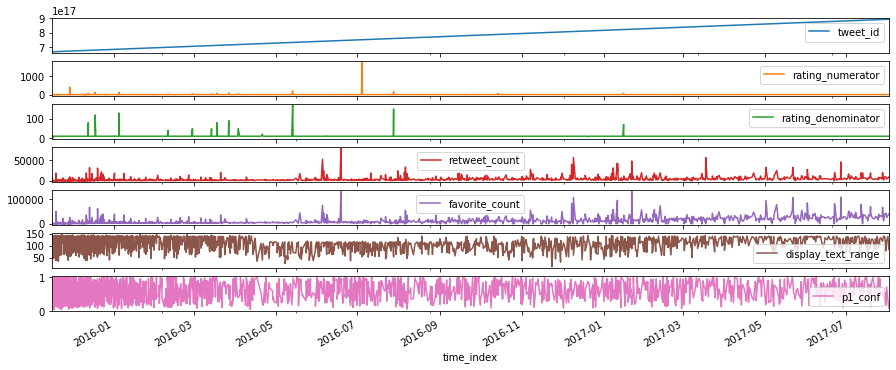

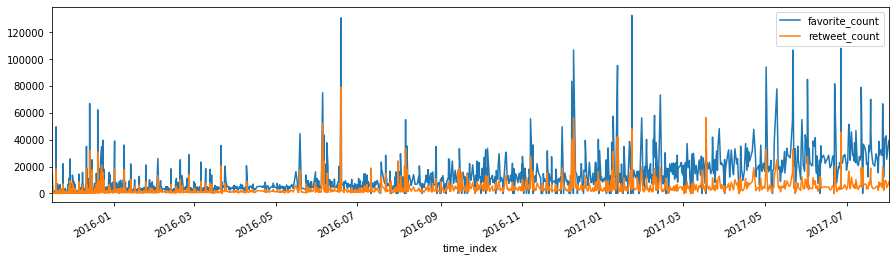

In [573]:
#df.plot(figsize=(15,4))
df.plot(subplots=True, figsize=(15,6))
df.plot(y=["favorite_count", "retweet_count"], figsize=(15,4));

C:\Users\mengf\Miniconda3\envs\py37\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


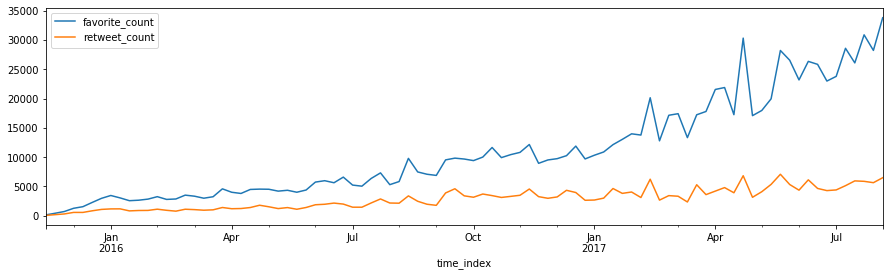

In [574]:
df[["favorite_count", "retweet_count"]].resample("1w").median().plot(figsize=(15,4));

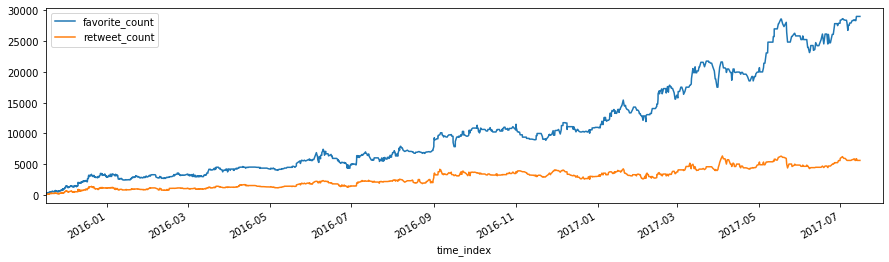

In [575]:
df[["favorite_count", "retweet_count"]].rolling(30).median().plot(figsize=(15,4));

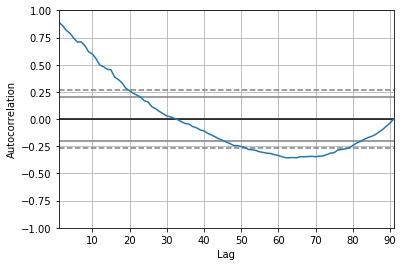

In [576]:
# 如果是周期的可以用这个(后续研究)
pd.plotting.autocorrelation_plot(df["favorite_count"].resample("1w").median());

In [577]:
df.columns

Index(['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count',
       'display_text_range', 'p1', 'p1_conf', 'p1_dog', 'clean_text'],
      dtype='object')

## / sentiment analysis
- 使用sklearn https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
- 另外比较常见的是使用 nltk 库
- 此处先pass, 深度学习时候有空再深入

# 结论
## / favorite 和 retweet 时序分析
- 2016年上半年之前, favorite 数量大概是 retweet 的两倍
- 但再这之后, favorite 数量大量上涨, retweet 数量上涨十分缓慢(两者之比达到6倍)
- 推测相关因素如下:
    - 可以看出 twitter 增长非常迅速(可惜缺少用户量相关的数据)
    - 但是人们愿意付出更多一点时间 retweet 的时间在减少, 可能原因是当人接触到更多的 twitter 信息后, 能够 retweet 的注意力已经没有什么增长空间了(注意力处于饱和状态)

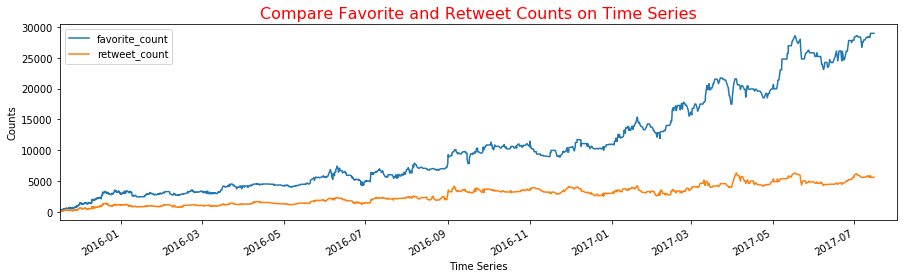

In [578]:
# 使用30天滚动平均值完成作图
df[["favorite_count", "retweet_count"]].rolling(30).median().plot(figsize=(15,4));
plt.xlabel('Time Series')
plt.ylabel('Counts')
plt.title('Compare Favorite and Retweet Counts on Time Series', color='r', fontsize=16);

## / favorate 和 retweet 相关性分析
- 分析中过滤掉了 retweet 为0的数据和大于1000的数据
- 此处考虑的是两个参数的对应关系, 和问题1的趋势并不冲突(因为数据做了过滤)
- 可以看出在 favorate 和 retweet 两个数据中间具有相关性
- 回归线要用到 sm 库或 sklearn 库, 后续研究 https://nbviewer.jupyter.org/github/weecology/progbio/blob/master/ipynbs/statistics.ipynb

C:\Users\mengf\Miniconda3\envs\py37\lib\site-packages\pandas\core\generic.py:457: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
C:\Users\mengf\Miniconda3\envs\py37\lib\site-packages\pandas\core\generic.py:465: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()


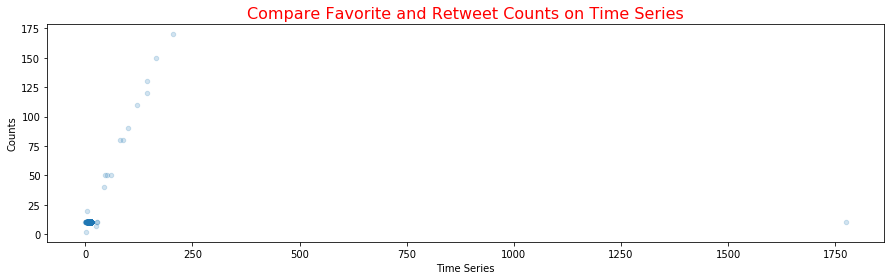

In [579]:
# 增加数据后，此图x，y需要再调整
df.query('0 < favorite_count < 10000').plot.scatter(y,z,alpha=0.2,figsize=(15,4));
plt.xlabel('Time Series')
plt.ylabel('Counts')
plt.title('Compare Favorite and Retweet Counts on Time Series', color='r', fontsize=16);

## / word cloud 分析
- 对评论使用 word cloud 进行分析
- 去掉了 stop words
- 图像为 twitter 英文字符(小鸟图不太美观)

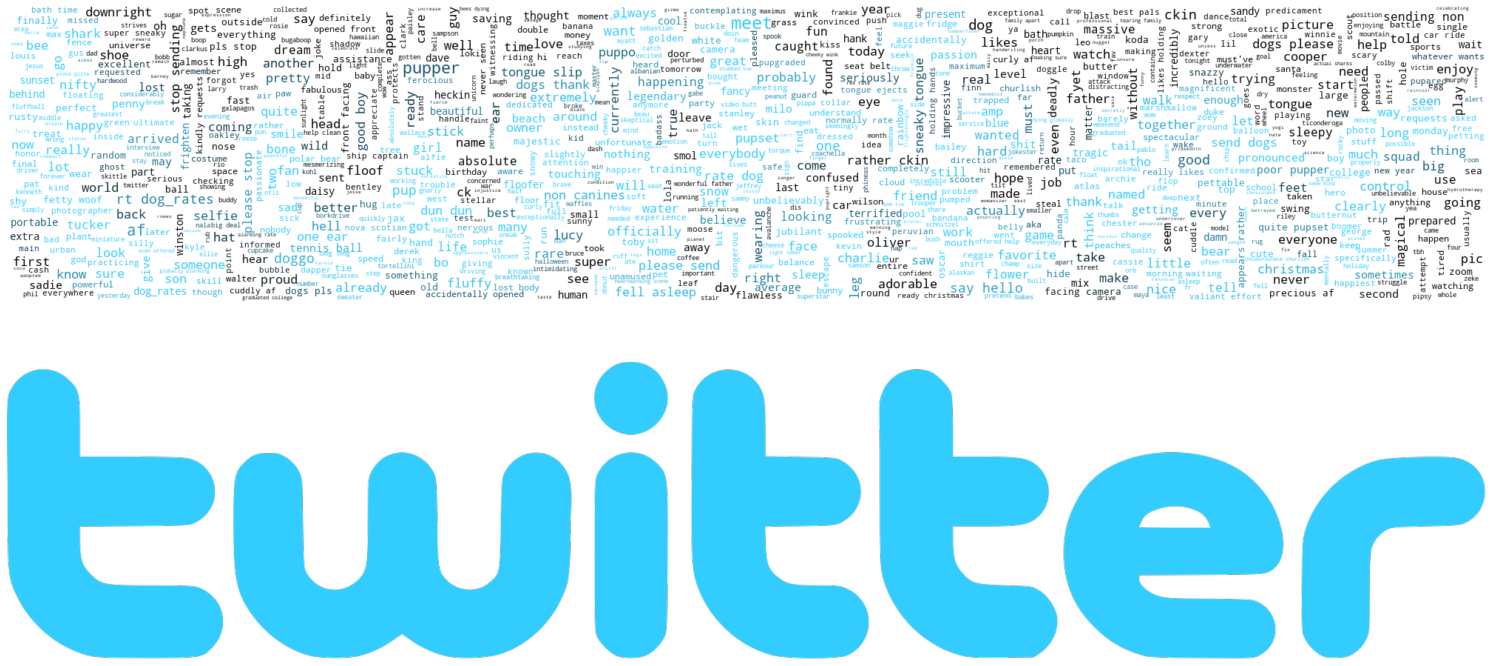

In [580]:
# set wc paras
wc = WordCloud(background_color="white", max_words=1000, mask=color4,
               stopwords=stopwords, max_font_size=24, relative_scaling=0.3, width=2400, height=800, random_state=42)

# gen wc
wc.generate(text_twitter);

# create coloring from image
image_colors = ImageColorGenerator(color4)

# gen pic
fig, axes = plt.subplots(2, 1,figsize=(36,12))
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(color4, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off();
plt.show();

## / text range 分析
- text range 改名为 text range 更为明确
- 数据做了过滤(过滤掉了个别 160 字符的)
- 数据有左偏斜趋势 (不能断定) 因为在140字的限制上有大量出现, 所以明显存在人为调整
- 有些数据超出了140
- 后续可以做异常值分析(按说不应该有超出, 也可能是正则化过滤时留下的问题)

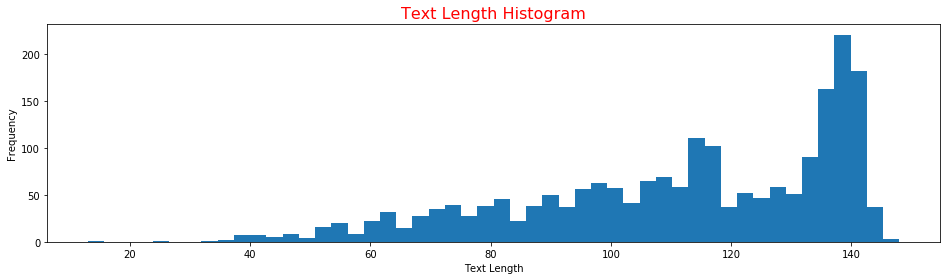

In [581]:
df.query('display_text_range < 150').display_text_range.plot.hist(bins=50,figsize=(16,4))
plt.xlabel('Text Length')
plt.title('Text Length Histogram', color='r', fontsize=16);

## / 后续完善
- 增加数据feature: 虽然原始数据 featrue 比较多, 但经过梳理发现所剩数据不多. 像用户日活, 注册量等信息缺失.
- 完善情感分析: 情感分析可以画出 积极/消极/主观/客观 两个维度的信息. 便于增加数据用以更多分析 (比如 140字的回复中, 是积极信息多还是消极信息多)
- 完善 source 分类数据: 本来很关注的feature, 因为数据收集的问题(可能是数据收集时ios比较好记录), 这点非常重要, 因为起码从尝试来讲 android 的不应该这么少. 这种情况会造成数据偏见, 可能带来错误的结论